In [2]:
import random
import heapq
from statistics import mean
import matplotlib.pyplot as plt


class TableGen:
    
    def __init__(self, no_of_people, relationships, no_in_pop):
        self.no_of_people = no_of_people
        self.no_in_pop = no_in_pop
        self.table = self.create_first_pop()
        self.relationships = relationships
        self.no_of_relationships = self.generate_relationships()
    
    def generate_relationships(self):
        rels = []
        for i in range(self.relationships):
            a = random.randint(0, self.no_of_people)
            b = random.randint(0, self.no_of_people)
            while a == b:
                b = random.randint(0, self.no_of_people)
            rels.append([a, b])
        for pair in rels:
            pair = sorted(pair)
        return rels
    
    def create_table_set(self):
        people = [-1 for i in range(self.no_of_people)]
        for i in range(self.no_of_people):
            random_seat = random.randint(0, self.no_of_people-1)
            random_place = random.randint(0, self.no_of_people-1)
            while random_seat in people:
                random_seat = random.randint(0, self.no_of_people-1)
            while people[random_place] != -1:
                random_place = random.randint(0, self.no_of_people-1)
            people[random_place] = random_seat
        return people

    def create_first_pop(self):
        pop = []
        for i in range(self.no_in_pop):
            pop.append(self.create_table_set())
        return pop

    
class GeneticAlgorithm:
    
    def __init__(self, no_in_pop, no_of_people, starting_table, relationships, mutation_rate, generations):
        self.best_score = []
        self.best_seating = []
        self.table = starting_table
        self.relationships = relationships
        self.mutation_rate = mutation_rate
        self.generations = generations
        self.no_in_pop = no_in_pop
        self.avg_score = []
        
    def calculate_relationship_score(self):
        pop_scores = []
        for seating in self.table:
            score = 0
            for index, value in enumerate(seating):
                if index != 0 and index != len(seating)-1:
                    if sorted([seating[index], seating[index-1]]) in self.relationships:
                        score += 1
                    if sorted([seating[index], seating[index+1]]) in self.relationships:
                        score += 1
                elif index == 0:
                    if sorted([seating[index], seating[index+1]]) in self.relationships:
                        score += 1
                    if sorted([seating[index], seating[len(seating)-1]]) in self.relationships:
                        score += 1
                else:
                    if sorted([seating[index], seating[index-1]]) in self.relationships:
                        score += 1
                    if sorted([seating[index], seating[0]]) in self.relationships:
                        score += 1
            pop_scores.append(score)
        self.best_score.append(max(pop_scores))
        self.avg_score.append(mean(pop_scores))
        return pop_scores


    def choose_best_indexes_from_pop(self):
        pop_scores = self.calculate_relationship_score()
        max_scores = heapq.nlargest(2, set(pop_scores))
        max_indexes = [i for i, v in enumerate(pop_scores) if v == max_scores[0]]
        self.best_seating.append(self.table[max_indexes[0]])
        if len(max_indexes) >= 2:
            max_indexes = max_indexes[:2]
        elif len(max_indexes) == 1:
            second_best_index = [i for i, v in enumerate(pop_scores) if v == max_scores[1]][0]
            max_indexes = [max_indexes[0], second_best_index]
        max_indexes = [int(i) for i in max_indexes]
        return max_indexes

    @staticmethod
    def generate_child(parent1, parent2):
        child, child_p1, child_p2 = [], [], []
        rand_gene_1 = int(random.random() * len(parent1))
        rand_gene_2 = int(random.random() * len(parent1))
        start_gene = min(rand_gene_1, rand_gene_2)
        end_gene = max(rand_gene_1, rand_gene_2)
        for i in range(start_gene, end_gene):
            child_p1.append(parent1[i])   
        child_p2 = [item for item in parent2 if item not in child_p1]
        child = child_p1 + child_p2
        return child

    def generate_population_of_children(self, parent1, parent2):
        children = []
        for i in range(self.no_in_pop):
            children.append(self.generate_child(parent1, parent2))
        return children

    def mutate(self, child):
        for index, value in enumerate(child):
            if random.random() > self.mutation_rate:
                ind_to_change = int(random.random() * len(child))
                child[index], child[ind_to_change] = child[ind_to_change], child[index]
        return child

    def mutate_population(self, children):
        mutated = []
        for i in children:
            mutated_child = self.mutate(i)
            mutated.append(mutated_child)
        self.table = mutated
        return mutated
        
    def run_genetic_algorithm(self):
        for i in range(self.generations):
            selection = self.choose_best_indexes_from_pop()
            parent1, parent2 = self.table[selection[0]], self.table[selection[1]]
            children = self.generate_population_of_children(parent1, parent2)
            mutated_children = self.mutate_population(children)


In [17]:
table = TableGen(40, 150, 60)
ga = GeneticAlgorithm(table.no_in_pop, table.no_of_people, table.table, table.no_of_relationships, 0.92, 20)
ga.run_genetic_algorithm()
print(ga.best_score)
print(ga.best_seating[-1])

[20, 20, 24, 26, 28, 32, 32, 32, 30, 28, 28, 32, 30, 32, 34, 34, 36, 38, 38, 42]
[24, 38, 35, 31, 11, 20, 7, 12, 2, 19, 14, 23, 4, 13, 16, 9, 30, 3, 18, 32, 34, 36, 10, 25, 29, 37, 33, 39, 5, 21, 0, 8, 17, 28, 27, 22, 6, 26, 1, 15]


Text(0.5, 1.0, 'Max score throughout generations (pop size: 60, agents: 40, no of rels: 150)')

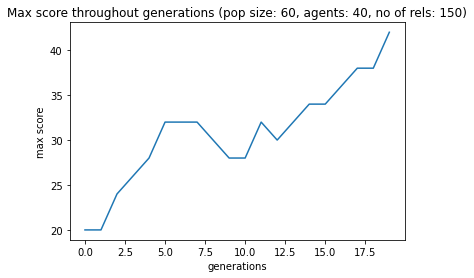

In [18]:
plt.plot(ga.best_score)
plt.xlabel('generations')
plt.ylabel('max score')
plt.title(f'Max score throughout generations (pop size: {table.no_in_pop}, agents: {table.no_of_people}, no of rels: {table.relationships})')

Text(0.5, 1.0, 'Avg score throughout generations (pop size: 60, agents in 1 pop: 40, no of rels: 150)')

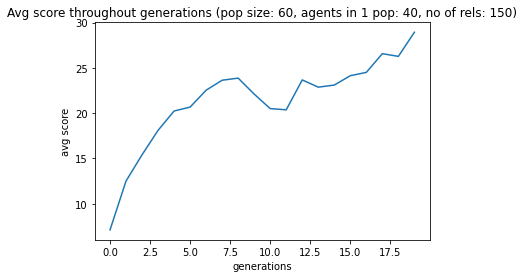

In [19]:
plt.plot(ga.avg_score)
plt.xlabel('generations')
plt.ylabel('avg score')
plt.title(f'Avg score throughout generations (pop size: {table.no_in_pop}, agents in 1 pop: {table.no_of_people}, no of rels: {table.relationships})')